In [11]:
# Importing the necessary libraries and setting the warnings to be ignored
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [12]:
# # Mounting Google Drive (only needed when running in Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')


In [13]:
# Loading the image data (X) and labels (Y)
X = np.load('data/X_half_stratified.npy')  # Images
Y = np.load('data/Y_half_stratified.npy')  # Labels (0 = not IDC, 1 = IDC)


In [14]:
# Printing the count of IDC-positive and IDC-negative samples
print(np.count_nonzero(Y == 1))  # IDC-positive
print(np.count_nonzero(Y == 0))  # IDC-negative


1394
1380


In [15]:
# Shuffling the data
from sklearn.utils import shuffle
X,Y = shuffle(X,Y)


In [16]:
# Displaying a selection of images and their labels
imgs_0 = X[Y == 0]  # IDC-negative images
imgs_1 = X[Y == 1]  # IDC-positive images

plt.figure(figsize=(20,20))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.title('IDC = %d'%Y[i])
    plt.imshow(X[i])


In [ ]:
# Printing statistics about the images and labels
print('X_images.shape =', X.shape)
print('X_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(X.min(),X.mean(), X.std(), X.max()))
print('')
print('Y_images.shape =', Y.shape)
print('Y_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(Y.min(),Y.mean(), Y.std(), Y.max()))


X_images.shape = (2774, 50, 50, 3)
X_images.min/mean/std/max = 2.00/172.59/45.99/255.00

Y_images.shape = (2774,)
Y_images.min/mean/std/max = 1.00/1.00/0.00/1.00


In [ ]:
# Function to describe the data
def describeData(images, labels):
    print('Total number of images: {}'.format(len(images)))
    print('Number of IDC(-) Images: {}'.format(np.sum(labels==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(labels==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(labels)))
    print('Image shape (Width, Height, Channels): {}'.format(images[0].shape))

describeData(X, Y)


Total number of images: 2774
Number of IDC(-) Images: 0
Number of IDC(+) Images: 2774
Percentage of positive images: 100.00%
Image shape (Width, Height, Channels): (50, 50, 3)


IndexError: index 10 is out of bounds for axis 0 with size 0

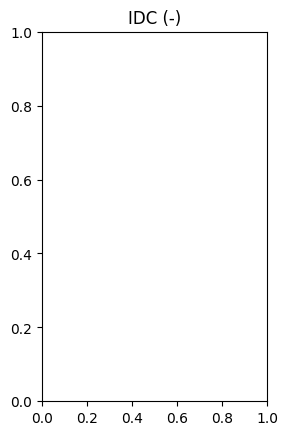

In [ ]:
# Function to plot an IDC-negative image and an IDC-positive image
def plotOne(a, b):
    plt.subplot(1,2,1)
    plt.title('IDC (-)')
    plt.imshow(a[100])
    plt.subplot(1,2,2)
    plt.title('IDC (+)')
    plt.imshow(b[100])

imgs0 = X[Y==0]  # IDC-negative images
imgs1 = X[Y==1]  # IDC-positive images
plotOne(imgs0, imgs1)


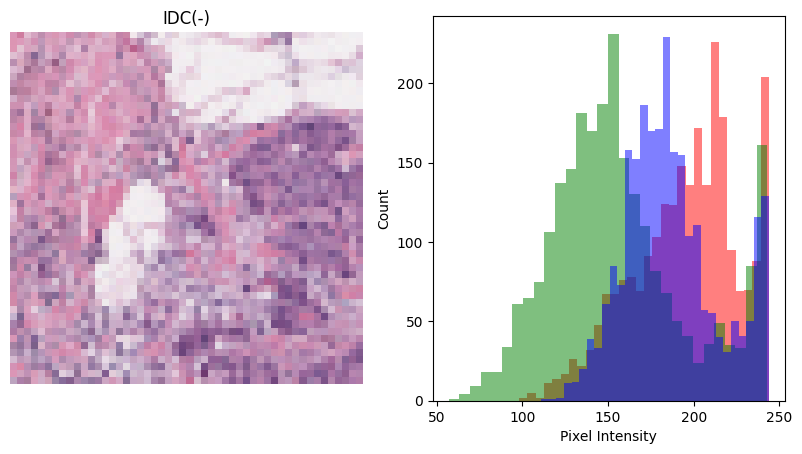

In [ ]:
# Function to plot an image and its histogram
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if Y[1] else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)

plotHistogram(X[29])


In [ ]:
# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Keeping a copy of the original split
X_train1, X_test1, Y_train1, Y_test1 = X_train, X_test, Y_train, Y_test

# Reducing the size of the data for faster processing
X_train = X_train[0:30000]
Y_train = Y_train[0:30000]
X_test = X_test[0:30000]
Y_test = Y_test[0:30000]


In [ ]:
# Normalizing the images by dividing by 256
X_train = X_train / 256.0
X_test = X_test / 256.0

print("Training Data Shape:", X_train.shape, Y_train.shape)
print("Testing Data Shape:", X_test.shape, Y_test.shape)


Training Data Shape: (4437, 50, 50, 3) (4437,)
Testing Data Shape: (1110, 50, 50, 3) (1110,)


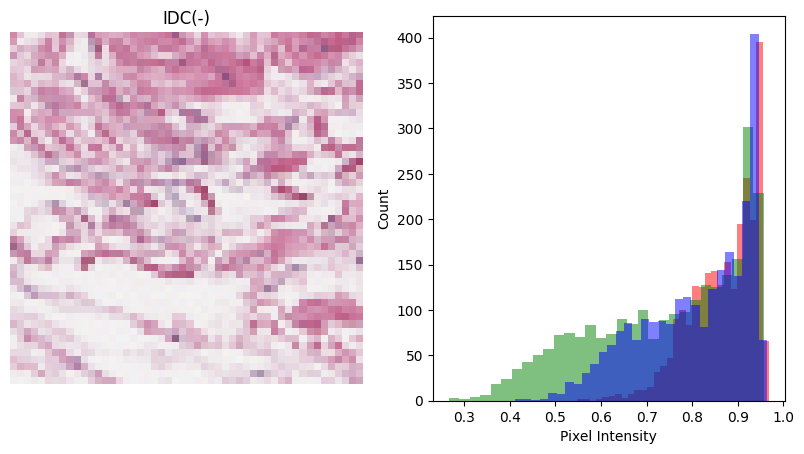

In [ ]:
# Plotting the histogram of an image from the normalized training data
plotHistogram(X_train[29])
